# Python Essentials: Data Visualization.
    Ben Christensen
    Math 345
    December 5, 2017

In [1]:
import numpy as np
from scipy.stats import linregress,pearsonr
from scipy.special import binom
from matplotlib import rcParams, colors, pyplot as plt
from itertools import combinations

%matplotlib inline

rcParams["figure.figsize"] = (8,8)

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

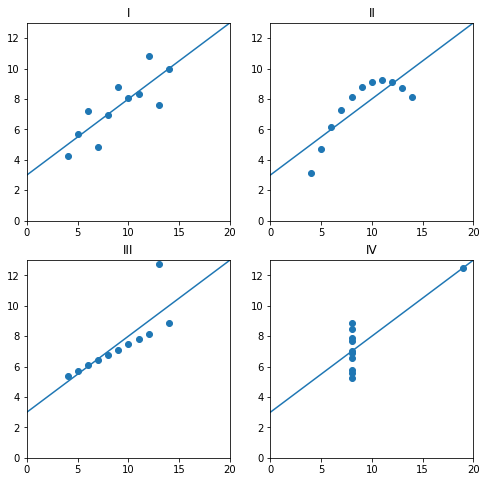

Quartet I:
Mean of x: 9.0
Mean of y: 7.50090909091
Var of x: 10.0
Var of y: 3.75206280992
Regression slope: 0.500090909091
Regression intercept: 3.00009090909
Corr coefficient: 0.816420516345 

Quartet II:
Mean of x: 9.0
Mean of y: 7.50090909091
Var of x: 10.0
Var of y: 3.75239008264
Regression slope: 0.5
Regression intercept: 3.00090909091
Corr coefficient: 0.816236506 

Quartet III:
Mean of x: 9.0
Mean of y: 7.5
Var of x: 10.0
Var of y: 3.74783636364
Regression slope: 0.499727272727
Regression intercept: 3.00245454545
Corr coefficient: 0.81628673949 

Quartet IV:
Mean of x: 9.0
Mean of y: 7.50090909091
Var of x: 10.0
Var of y: 3.74840826446
Regression slope: 0.499909090909
Regression intercept: 3.00172727273
Corr coefficient: 0.816521436889 

The means of the 'x's are all the same. 
All of the other statistics are very similar.
The most surprising one is the correlation coefficient 
which is very similar although the regression line 
seems to be more appropriate for some graphs than 

In [2]:
# Problem 1

A = np.load("anscombe.npy")

x = np.linspace(0, 20, 100)

plt.subplot(221)
plt.scatter(A[:, 0], A[:,1])
plt.xlim(0, 20)
plt.ylim(0, 13)
y = linregress(A[:, 0:2])[0] * x + linregress(A[:, 0:2])[1]
plt.plot(x, y)
plt.title("I")

plt.subplot(222)
plt.scatter(A[:, 2], A[:,3])
plt.xlim(0, 20)
plt.ylim(0, 13)
y = linregress(A[:, 2:4])[0] * x + linregress(A[:, 2:4])[1]
plt.plot(x, y)
plt.title("II")

plt.subplot(223)
plt.scatter(A[:, 4], A[:,5])
plt.xlim(0, 20)
plt.ylim(0, 13)
y = linregress(A[:, 4:6])[0] * x + linregress(A[:, 4:6])[1]
plt.plot(x, y)
plt.title("III")

plt.subplot(224)
plt.scatter(A[:, 6], A[:,7])
plt.xlim(0, 20)
plt.ylim(0, 13)
y = linregress(A[:, 6:8])[0] * x + linregress(A[:, 6:8])[1]
plt.plot(x, y)
plt.title("IV")

plt.show()
titles = ["I", "II", "III", "IV"]
for i in range(4):
    print("Quartet ", titles[i], ":", sep='')
    print("Mean of x:", np.mean(A[:,2*i]))
    print("Mean of y:", np.mean(A[:,2*i + 1]))
    print("Var of x:", np.var(A[:, 2*i]))
    print("Var of y:", np.var(A[:, 2*i + 1]))
    print("Regression slope:", linregress(A[:, 2*i:2*(i+1)])[0])
    print("Regression intercept:", linregress(A[:, 2*i:2*(i+1)])[1])
    print("Corr coefficient:", linregress(A[:, 2*i:2*(i+1)])[2], "\n")

print("""The means of the 'x's are all the same. 
All of the other statistics are very similar.
The most surprising one is the correlation coefficient 
which is very similar although the regression line 
seems to be more appropriate for some graphs than others. 
        """)

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

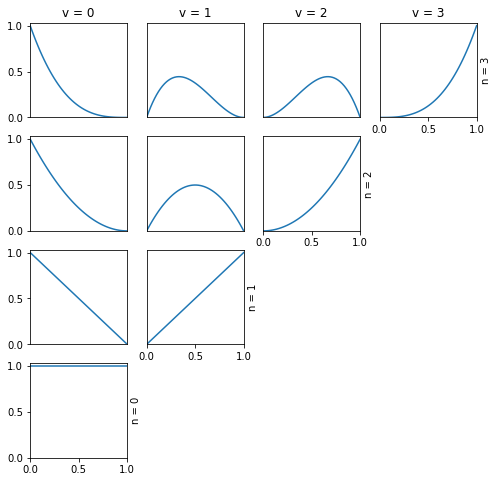

In [3]:
# Problem 2
axis = dict()
i = 0
x = np.linspace(0, 1, 50)
for n in range(3, -1, -1):
    for v in range(n+1):
        Bernstein = binom(n,v) * x**v * (1-x) ** (n - v)
        axis[i] = plt.subplot(4, 4, (3-n) * 4 + v + 1)
        axis[i].plot(x, Bernstein)
        if n == 3:
            title = "v = " + str(v)
            axis[i].set_title(title)
        if v != 0:
            axis[i].tick_params(axis='y', which='both', left='off', top='off', labelleft='off')

        if v == n:

            axis[i].yaxis.set_label_position("right")
            ylabel = "n = " + str(n)
            axis[i].set_ylabel(ylabel)
        if v != n:
            axis[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off')

        axis[i].axis([0, 1, 0, 1.03])
        i += 1
        

plt.show()


### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

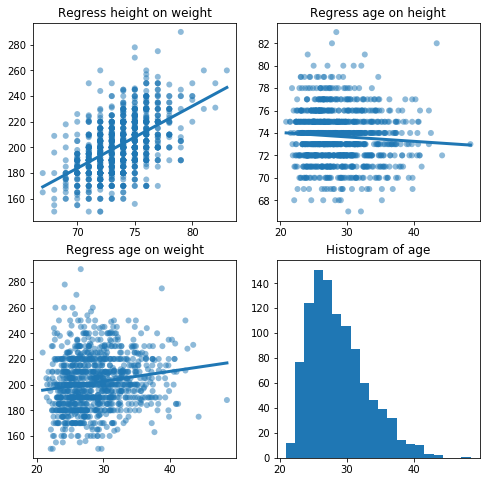

In [4]:
# Problem 3
height, weight, age = np.load("MLB.npy").T
plt.subplot(221)
plt.scatter(height, weight, alpha=.5, edgecolor='none')
linregress(height, weight)
x = np.linspace(min(height), max(height), 47)
y = linregress(height, weight)[0] * x + linregress(height, weight)[1]
plt.plot(x, y, linewidth=3)
plt.title("Regress height on weight")

plt.subplot(222)
plt.scatter(age, height, alpha=.5, edgecolor='none')
linregress(age, height)
x = np.linspace(min(age), max(age), 47)
y = linregress(age, height)[0] * x + linregress(age, height)[1]
plt.plot(x, y, linewidth=3)
plt.title("Regress age on height")

plt.subplot(223)
plt.scatter(age, weight, alpha=.5, edgecolor='none')
linregress(age, weight)
x = np.linspace(min(age), max(age), 47)
y = linregress(age, weight)[0] * x + linregress(age, weight)[1]
plt.plot(x, y, linewidth=3)
plt.title("Regress age on weight")

plt.subplot(224)
plt.hist(age, bins=20)
plt.title("Histogram of age")

plt.show()

### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

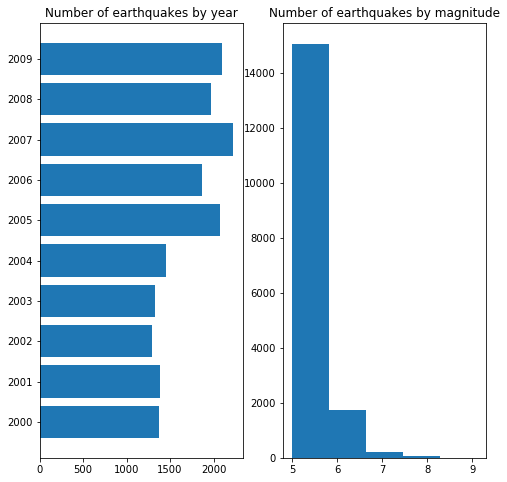

In [9]:
# Problem 4
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T

plt.subplot(121)
labels = np.arange(2000, 2010, 1)
values = []
for i in range(10):
    f = 2000 + i
    mask1 = years >= f
    mask2 = years < f+1
    #mask = (years >= f) & (years < f+1)
    values.append(np.sum(mask1 * mask2))
positions = np.arange(len(labels))
plt.barh(positions, values, align='center')
plt.yticks(positions, labels)
plt.title("Number of earthquakes by year")

plt.subplot(122)
plt.hist(magnitudes, bins=5)
plt.title("Number of earthquakes by magnitude")

plt.show()


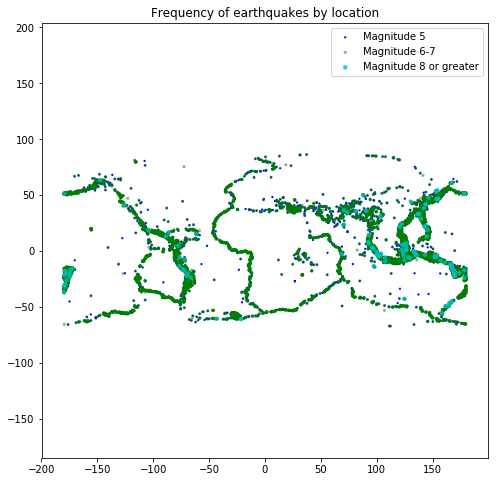

In [34]:

small = np.where(magnitudes<6)
medium = np.where((magnitudes<8) & (magnitudes>5))
large = np.where(magnitudes>7)
plt.scatter(longitude[small], latitude[small], alpha=1, edgecolor='none', s=5, color='b', label="Magnitude 5")
plt.scatter(longitude[medium], latitude[medium], alpha=.5, edgecolor='none', s=10, color='g', label="Magnitude 6-7")
plt.scatter(longitude[large], latitude[large], alpha=.8, edgecolor='none', s=20, color='c', label="Magnitude 8 or greater")
plt.axis('equal')
plt.title('Frequency of earthquakes by location')
plt.legend()
plt.show()

### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

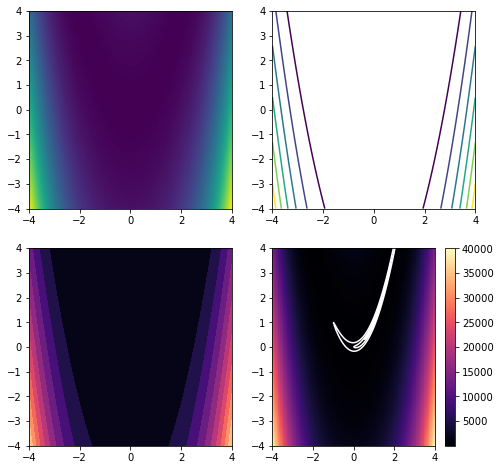

In [42]:
# Problem 5
rosen = lambda x,y: (1. - x)**2 + 100.*(y - x**2)**2

x = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, x)
fig, ax = plt.subplots(2, 2)
Z = rosen(X,Y)
ax[0, 0].pcolormesh(X, Y, Z, cmap="viridis")
ax[0, 1].contour(X, Y, Z, 6, cmap="viridis")
ax[1, 0].contourf(X, Y, Z, 12, cmap="magma")
ax[1, 1].contour(X, Y, Z, [-1, -.25, 0, .25, 1, 4], colors="white")
cax = ax[1, 1].pcolormesh(X, Y, Z, cmap="magma")
fig.colorbar(cax, ax=ax[1,1])
plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

In [8]:
# Problem 6
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

